In [30]:
import vegas
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def f(x):
    dx = x[0] * np.sin(x[2]) - x[1] * np.sin(x[3])
    dy = x[0] * np.cos(x[2]) - x[1] * np.cos(x[3])
    dz = x[4] - x[5]
    return x[0] * x[1] * dx / (dx**2 + dy**2 + dz**2)**(1.5)

In [38]:
a = 1
hs = np.array([1, 2, 4, 6, 8, 12, 16, 24, 32])
ra = []
er = []
for h in hs:
    integ = vegas.Integrator([[0, a/h], [0, a/h], [0, np.pi], [0, 2*np.pi], [0, 1], [0, 1]])
    result = integ(f, nitn=20, neval=50000)
    ra.append(result.mean / (4*np.pi*((a/h)**3)/3))
    er.append(result.sdev / (4*np.pi*((a/h)**3)/3))
    print(ra[-1], er[-1])

0.47216121513769693 0.0065378172926472975
0.6591118808606377 0.007856652257260822
0.794525476479466 0.010069406291309065
0.8682220794088689 0.011197354625772772
0.8904358275550711 0.012993289647768424
0.9063084066296747 0.013250365363117165
0.9662578824209276 0.016678334005616934
0.9416631350693521 0.020266544238647193
0.9669429023444344 0.021373738597672786


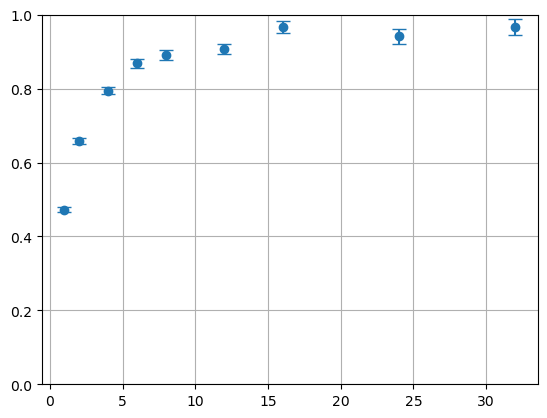

In [44]:
plt.errorbar(hs, ra, er, linestyle = "", capsize = 5, fmt = 'o')
plt.grid('True')
plt.ylim(0, 1)
plt.show()